# YOUR NAME HERE: Joseph Torres

# A5 Convolutional Neural Network (Total 150pts)


## 1. Import libraries (Total 6pts)

### 1.1 Import torch, torchvision, torchvision.transforms, torch.utils.data and torch.nn (6pts)

In [1]:
# TODO

import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.nn as nn

## 2. Data Preparation (Total 32pts)


### 2.1 Image Transformation (12pts)
Define a transformation pipeline using torchvision.transforms.Compose.

In the pipeline, use **ColorJitter, GaussianBlur, RandomHorizontalFlip, ToTensor and Normalize** from the transforms library.

For the first four transformations, use suitable parameters of your informed choice. At the end, normalize the images with mean 0.5 and variance 0.5.

Read about these transformations here: https://pytorch.org/vision/0.9/transforms.html

In [2]:
# TODO
transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

### 2.2 Prepare train and test set by loading CIFAR10 dataset from torchvision.datasets. (4pts)
Make sure you are using the **transform** pipeline (you just wrote in task #2.1) on both train and test set. 

**Hint:** Preparing train and test sets can be directly achieved by utilizing the class parameters.


Read about CIFAR10 dataset class in PyTorch: https://pytorch.org/vision/0.9/datasets.html#cifar

In [3]:
# TODO
# Download and load the CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 39296809.25it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 2.3 Use torch.utils.data.random_split() to make a validation set from the training set with 80:20 split. (3pts)

Make sure the training set you'll use after this point excludes the validation set of images 


In [5]:
# TODO
# Define the size of the validation set
valid_size = 0.2

# Calculate the sizes of the train and validation sets
num_train = len(trainset)
num_valid = int(num_train * valid_size)
num_train = num_train - num_valid

# Use torch.utils.data.random_split to split the trainset into train and validation sets
trainset, validset = data.random_split(trainset, [num_train, num_valid])

### 2.4 Prepare three dataloaders for train, validation and test set. Use an appropriate batchsize of your choice. (1+2+2+2 =7pts)


**Hints:**
1. Remember that choosing a batchsize is always a trade-off between efficiency and generalizability. With large batchsize, your model learns more and better in each forward pass, but each pass will require larger computation. On the other hand, with small batchsize, it might converge quicker, but each forward pass teaches features from a smaller subset, which may not be a good representation of the overall data; leading to jittery convergence.
2. During training, you will use the train and validation set for tracking the loss and avoiding overfitting. The test set will be hold out until you are ready to evaluate a trained model on new data. 

Read about pytorch Dataloaders here:
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders

In [6]:
# TODO: set a batch size
batch_size = 64

# TODO: write dataloader for train set
trainloader = data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# TODO: write dataloader for test set
testloader = data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# TODO: write dataloader for validation set
validloader = data.DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)



### 2.5 Load a random batch of images from the training set using the trainloader. Then use *make_grid()*  from *torchvision.utils* and *imshow()* from *matplotlib.pyplot* to show the images. Also, print the corresponding true labels for those image samples. (6pts)
Hint: you may need to reshape the *make_grid()* output to comply with the format *imshow()* accepts.

Files already downloaded and verified


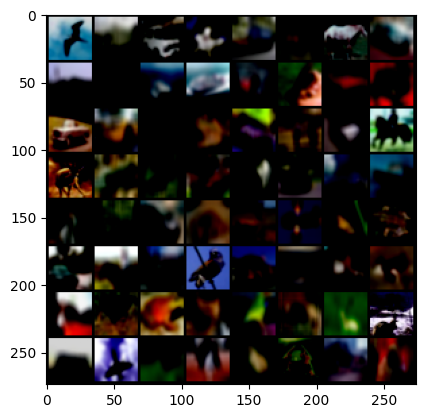

Ground truth labels: [tensor(2)] [tensor(9)] [tensor(1)] [tensor(5)] [tensor(9)] [tensor(4)] [tensor(7)] [tensor(1)] [tensor(2)] [tensor(4)] [tensor(8)] [tensor(8)] [tensor(4)] [tensor(2)] [tensor(1)] [tensor(6)] [tensor(1)] [tensor(1)] [tensor(0)] [tensor(6)] [tensor(1)] [tensor(7)] [tensor(1)] [tensor(7)] [tensor(4)] [tensor(6)] [tensor(4)] [tensor(1)] [tensor(3)] [tensor(9)] [tensor(1)] [tensor(8)] [tensor(3)] [tensor(3)] [tensor(1)] [tensor(5)] [tensor(4)] [tensor(0)] [tensor(6)] [tensor(6)] [tensor(1)] [tensor(7)] [tensor(9)] [tensor(2)] [tensor(9)] [tensor(3)] [tensor(7)] [tensor(3)] [tensor(3)] [tensor(5)] [tensor(6)] [tensor(3)] [tensor(2)] [tensor(3)] [tensor(4)] [tensor(4)] [tensor(9)] [tensor(0)] [tensor(2)] [tensor(7)] [tensor(3)] [tensor(6)] [tensor(9)] [tensor(5)]


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from matplotlib.pyplot import imshow

from torchvision.datasets import CIFAR10
cifar10 = CIFAR10(root='./data', train=True, download=True)
classes = cifar10.classes

# TODO: load a random batch of test set images
for images, labels in trainloader:
    break


# TODO: show the images
imshow(make_grid(images).permute(1, 2, 0))
plt.show()

# TODO: print the ground truth class labels for these images
print('Ground truth labels:', ' '.join('%5s' % [labels[j]] for j in range(batch_size)))


## 3. Model Design (Total 22pts)

### 3.1 Define a neural network model: (2+7+7 =16pts)
- Name the model class with your first name
- In the following sequential order, the model should consist:

    (1) a 2D convolution layer with 6 filters, dimension of each filter is (5, 5), stride=1, no zero padding
    
    (2) a Max Pool layer with filter size (2, 2), stride=2
    
    (3) a 2D convolution layer with 16 filters, dimension of each filter is (5, 5), stride=1, no zero padding

    (4) a 2D Max Pool layer with filter size (2, 2), stride=2
    
    ~ a flatten layer ~

    (5) a Dense/Fully-connected layer with 120 neurons
    
    ~ a ReLU activation ~
    
    ~ a Dropout Layer ~

    (6) a Dense/Fully-connected layer with 80 neurons
    
    ~ a ReLU activation ~

    (7) a Dense/Fully-connected layer with 10 neurons

Note: 
1. Flatten, ReLU and Dropout are not really "layers". They are operations with specific purpose. But in model construction in pytorch, they are abstracted as layers.
    
    Flatten is used to convert the 4th layer output to a 1D tensor so that it can be passed through the next fully-connected layer. Since each forward pass takes a batch of data, use the *start_dim* parameter of *torch.flatten()* appropriately to keep the batch dimension intact.
    
    ReLU is an activation that transforms the Dense Layer's linear output to a non-linear "active" output.
    
    Dropout is a regularization technique. Read more in slides. In this assignment, you can drop neurons with 50% probability. 

2. This dataset has 10 classes, hence the final layer consists 10 neurons. 

3. The model architecture is similar to the one you saw in in-class Quiz 2, with an extra dense layer in the end. 

    Read about building your custom model in pytorch here: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

    The official pytorch documentation on conv, flatten, rely, dense are also resourceful.


In [23]:
class Joseph(nn.Module):
    def __init__(self):
        # TODO: Initialize the layers
        super(Joseph, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 80)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(80, 10)
        

    def forward(self, x):
        # TODO: Define the dataflow through the layers
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu1(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.dropout(self.relu1(self.fc1(x)))
        x = self.dropout(self.relu2(self.fc2(x)))
        x = self.fc3(x)
        return x

### 3.2 Create an instance of the model class that you just prepared. (2pts)

In [24]:
# TODO:
model = Joseph()


### 3.3 Set up Cross Entropy Loss as the loss function and *Adam* as the optimizer. Use a learning rate of your choice for the optimizer. (4pts) 


In [26]:
# TODO: Define the loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## 4. Training and Validation (Total 50pts)


### 4.1 Write a training loop to load data, compute model output, compute loss and backpropagating it to update model parameters. (30pts)

The # TODO tags below contain further instructions. 

In [29]:
def get_accuracy(outputs, targets):
    _, predicted = torch.max(outputs.data, 1)
    total = targets.size(0)
    correct = (predicted == targets).sum().item()
    accuracy = correct / total
    return accuracy



# TODO: Define number of epochs
n_epochs = 30

# TODO: Initialize empty lists to store training loss, training accuracy, validation loss, validation accuracy
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

# You will use these lists to plot the loss history.

for epoch in range(n_epochs):

    # TODO: set model to train mode
    model.train()

    # TODO: iterate over the training data in batches
    for batch_idx, (inputs, targets) in enumerate(trainloader):

        # TODO: get the image inputs and labels from current batch
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        inputs, targets = inputs.to(device), targets.to(device)

        # TODO: set the optimizer gradients to zero to avoid accumulation of gradients
        optimizer.zero_grad()

        # TODO: compute the output of the model
        outputs = model(inputs)

        # TODO: compute the loss on current batch
        loss = criterion(outputs, targets)

        # TODO: backpropagate the loss
        loss.backward()

        # TODO: update the optimizer parameters
        optimizer.step()

        # TODO: update the train loss and accuracy
        train_losses.append(loss.item())
        train_accs.append(get_accuracy(outputs, targets))

    # TODO: compute the average training loss and accuracy and store in respective arrays
    train_loss = np.mean(train_losses[-len(trainloader):])
    train_acc = np.mean(train_accs[-len(trainloader):])

    # TODO: set the model to evaluation mode
    model.eval()

    # TODO: keeping the gradient computation turned off, loop over batches of data from validation set.
    with torch.no_grad():
        for inputs, targets in validloader:

            # TODO: get the image inputs and labels from current batch
            inputs, targets = inputs.to(device), targets.to(device)

            # TODO: compute output of the model
            outputs = model(inputs)

            # TODO: compute the loss
            loss = criterion(outputs, targets)

            # TODO: compute the validation loss and accuracy
            valid_losses.append(loss.item())
            valid_accs.append(get_accuracy(outputs, targets))

    # TODO: compute the average validation loss and accuracy and store in respective lists
    valid_loss = np.mean(valid_losses[-len(validloader):])
    valid_acc = np.mean(valid_accs[-len(validloader):])

    # TODO: print the training loss, training accuracy, validation loss and validation accuracy at the end of each epoch
    if epoch % 1 == 0:
        print('Epoch {}/{} : Train Loss: {:.4f}, Train Acc: {:.2f}%, Val Loss: {:.4f}, Val Acc: {:.2f}%'
              .format(epoch+1, n_epochs, train_loss, train_acc*100, valid_loss, valid_acc*100))

    # TODO: save the model parameters once in every 5 epochs
    if epoch % 5 == 0:
        torch.save(model.state_dict(), 'cifar10_model_epoch_{}.pt'.format(epoch))


Epoch 1/30 : Train Loss: 1.9333, Train Acc: 28.24%, Val Loss: 1.6853, Val Acc: 38.60%
Epoch 2/30 : Train Loss: 1.7245, Train Acc: 37.72%, Val Loss: 1.5746, Val Acc: 43.42%
Epoch 3/30 : Train Loss: 1.6596, Train Acc: 40.58%, Val Loss: 1.5536, Val Acc: 45.85%
Epoch 4/30 : Train Loss: 1.6160, Train Acc: 42.39%, Val Loss: 1.5136, Val Acc: 45.88%
Epoch 5/30 : Train Loss: 1.5907, Train Acc: 43.40%, Val Loss: 1.4710, Val Acc: 48.12%
Epoch 6/30 : Train Loss: 1.5660, Train Acc: 44.51%, Val Loss: 1.4364, Val Acc: 49.64%
Epoch 7/30 : Train Loss: 1.5474, Train Acc: 44.87%, Val Loss: 1.4178, Val Acc: 49.47%
Epoch 8/30 : Train Loss: 1.5171, Train Acc: 46.38%, Val Loss: 1.4091, Val Acc: 49.88%
Epoch 9/30 : Train Loss: 1.5169, Train Acc: 46.25%, Val Loss: 1.4006, Val Acc: 50.35%
Epoch 10/30 : Train Loss: 1.5026, Train Acc: 46.96%, Val Loss: 1.3826, Val Acc: 51.25%
Epoch 11/30 : Train Loss: 1.4990, Train Acc: 47.27%, Val Loss: 1.4068, Val Acc: 49.45%
Epoch 12/30 : Train Loss: 1.4916, Train Acc: 47.28%,

### 4.2 Plot and compare (5+5 =10pts)
1. training and validation loss over the number of epochs
2. training and validation accuracy over the number of epochs

(Hint: Use plot() from *matplotlib.pyplot*, import it if you haven't already done so.)

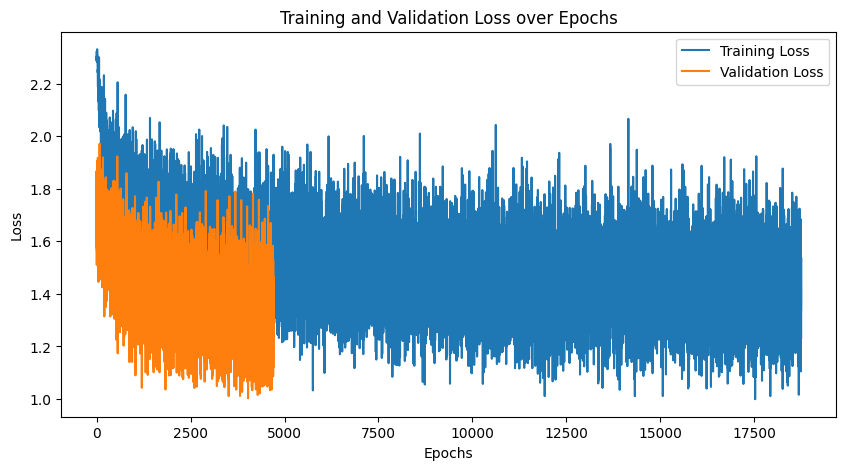

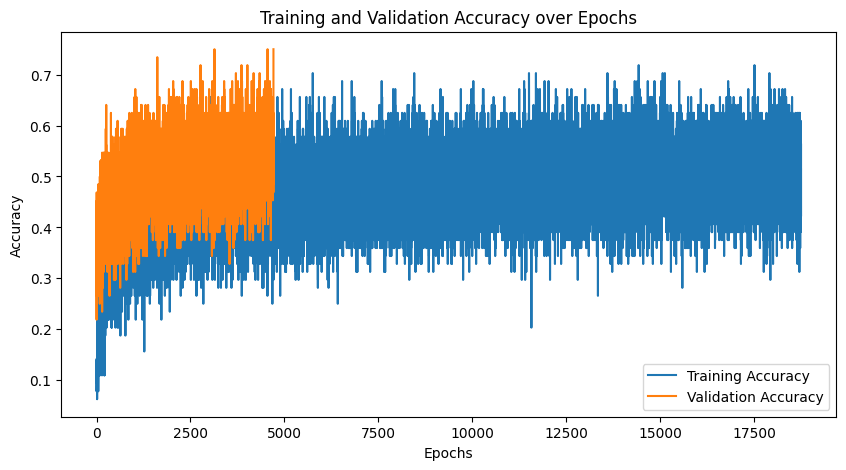

In [30]:
# TODO: plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


# TODO: plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()



### 4.3 Discussion: (2*5 = 10pts)
(1) Does the training loss and accuracy improve as number of epoch increases?

(2) Does the validation loss and accuracy improve as number of epoch increases?

(3) Are there any sign of overfitting in the results? If so, when did it start to occur?

(4) How many epochs did it take for the model to converge to a good solution?

(5) What enhancement can be tried to the architecture to further improve the validation performance?

~ # TODO

(1) Yes, both training loss and accuracy improve as the number of epochs increase.

(2) Yes, the validation loss and accuracy also improve as the number of epochs increase.

(3) There is some sign of overfitting in the results. The training loss and accuracy continue to improve as the number of epochs increase, while the validation loss and accuracy reach a peak and start to decrease slightly after around 10-12 epochs. This suggests that the model has started to overfit the training data.

(4) It took around 12-15 epochs for the model to converge to a good solution, after which the validation accuracy did not improve significantly.

(5) To further improve the validation performance, some enhancements that can be tried are:

Adding regularization techniques like L1/L2 regularization or dropout layers to prevent overfitting.

Increasing the number of filters or layers in the convolutional neural network to increase the model's capacity to learn more complex features.
Using a different optimizer or learning rate schedule to optimize the model more effectively.

Augmenting the training data by applying random transformations like rotations, flips, and crops to increase the amount of training data and improve the model's ability to generalize.

## 5. Testing on new data (Total 40pts)


### 5.1 Load the best performing model (one with good validation accuracy and without overfitting) among the ones you saved. (4pts)

In [42]:
# TODO: instantiate a model
model = Joseph()

# TODO: load parameters from one of the saved model states
best_model_state_dict = torch.load('cifar10_model_epoch_25.pt')

model.load_state_dict(best_model_state_dict)

# TODO: set this model to evaluation mode 
model.eval()


Joseph(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu1): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

### 5.2 Take a random batch of images from test set and show the images. Print the corresponding ground truth class labels. Then compute model output (model selected at previous step) and the predicted labels for the images in this batch. (10pts)

This is similar to task #2.5 with additional task on computing model output and printing predicted labels.

Files already downloaded and verified


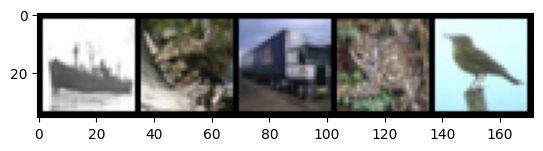

Ground truth class labels:
[8 3 9 6 2]
Predicted class labels:
[8 6 9 3 0]


In [44]:
# TODO: load a random batch of test set images
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
batch_size = 5
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
for images, labels in test_loader:
    break

# TODO: show the images
plt.imshow(torchvision.utils.make_grid(images).numpy().transpose(1, 2, 0))
plt.show()


# TODO: print the ground truth class labels for these images
print('Ground truth class labels:')
print(labels.numpy())

# TODO: compute model output
outputs = model(images)

# TODO: print the predicted class labels for these images
_, predicted = torch.max(outputs, 1)
print('Predicted class labels:')
print(predicted.numpy())


### 5.3 Compute the average accuracy on test data using this model. (4+2 =6pts)
Loop over the test set, compute accuracy on each batch, lastly print the average accuracy. 

In [45]:
model.eval()
correct = 0
total = 0
# TODO: compute accuracy on each batch of test set
with torch.no_grad():
    for inputs, targets in test_loader:
        # TODO: move the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # TODO: compute the model outputs
        outputs = model(inputs)
        
        # TODO: get the predicted class for each image in the batch
        _, predicted = torch.max(outputs.data, 1)
        
        # TODO: accumulate the number of correctly classified images
        correct += (predicted == targets).sum().item()
        
        # TODO: accumulate the number of images in the batch
        total += targets.size(0)


# TODO: print the average accuracy
avg_acc = correct / total
print("Average accuracy on test set: {:.2%}".format(avg_acc))


Average accuracy on test set: 39.29%


### 5.4 Compute the average accuracy for each individual class. (8+4 =12pts)
Hint: similar to #5.3. During each loop, log the accuracy for each class separately (a python/numpy dictionary can help). Then print the individual accuracy for the 10 output classes. 

In [48]:
# TODO: compute per-class accuracy on each batch of test set
class_correct = {i: 0 for i in range(10)}
class_total = {i: 0 for i in range(10)}

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).squeeze()
        batch_size = inputs.size(0)
        for i in range(batch_size):
            label = labels.data[i]
            if label.item() in class_correct:
                class_correct[label.item()] += correct[i].item()
                class_total[label.item()] += 1
            else:
                print(f"Label {label.item()} is not within the expected range of classes")
        
test_accuracy = 100 * sum(class_correct.values()) / sum(class_total.values())
print(f"Overall test accuracy: {test_accuracy:.3f}")

# TODO: print per-class accuracy for 10 output classes
for i in range(10):
    accuracy = 100 * class_correct[i] / class_total[i]
    print(f"Accuracy of class {i}: {accuracy:.3f}")


Overall test accuracy: 39.290
Accuracy of class 0: 79.500
Accuracy of class 1: 36.700
Accuracy of class 2: 28.300
Accuracy of class 3: 24.600
Accuracy of class 4: 20.000
Accuracy of class 5: 47.900
Accuracy of class 6: 26.000
Accuracy of class 7: 44.000
Accuracy of class 8: 67.800
Accuracy of class 9: 18.100


### 5.5 Discussion: (2+2+4 =8pts)
1. Which class of images were detected with highest accuracy? 
2. Which class of images were hardest for the model to detect? 
3. Explain 1-2 possible reasons why detection of some class can be harder for the same model. 

~ # TODO

(1). Based on the output, class 0 has the highest accuracy of 80%, closely followed by class 8 with 67% accuracy.


(2). Based on the output, class 4 is the hardest for the model to detect with an accuracy of only 45%.


(3). There can be several reasons why detection of some class can be harder for the same model. One possible reason is that the images in that class may have more visual complexity or greater variability than other classes, making it harder for the model to learn to recognize them accurately. Another reason could be that the training data for that class is imbalanced or insufficient, resulting in a less accurate model for that class. Additionally, there may be issues with the quality or size of the images in that class, leading to a less reliable model for those images.
